In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('datasets/historical_data.csv', parse_dates=['created_at', 'actual_delivery_time'])

In [3]:
df.head(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0


In [4]:
df.shape

(197428, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [6]:
# посмотрим на пропуски в данных
df.isna().sum().sort_values(ascending=False)

total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
store_primary_category                           4760
order_protocol                                    995
market_id                                         987
estimated_store_to_consumer_driving_duration      526
actual_delivery_time                                7
created_at                                          0
store_id                                            0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
estimated_order_place_duration                      0
dtype: int64

In [7]:
df.isna().mean().sort_values(ascending=False).round(6) * 100

total_onshift_dashers                           8.2369
total_busy_dashers                              8.2369
total_outstanding_orders                        8.2369
store_primary_category                          2.4110
order_protocol                                  0.5040
market_id                                       0.4999
estimated_store_to_consumer_driving_duration    0.2664
actual_delivery_time                            0.0035
created_at                                      0.0000
store_id                                        0.0000
total_items                                     0.0000
subtotal                                        0.0000
num_distinct_items                              0.0000
min_item_price                                  0.0000
max_item_price                                  0.0000
estimated_order_place_duration                  0.0000
dtype: float64

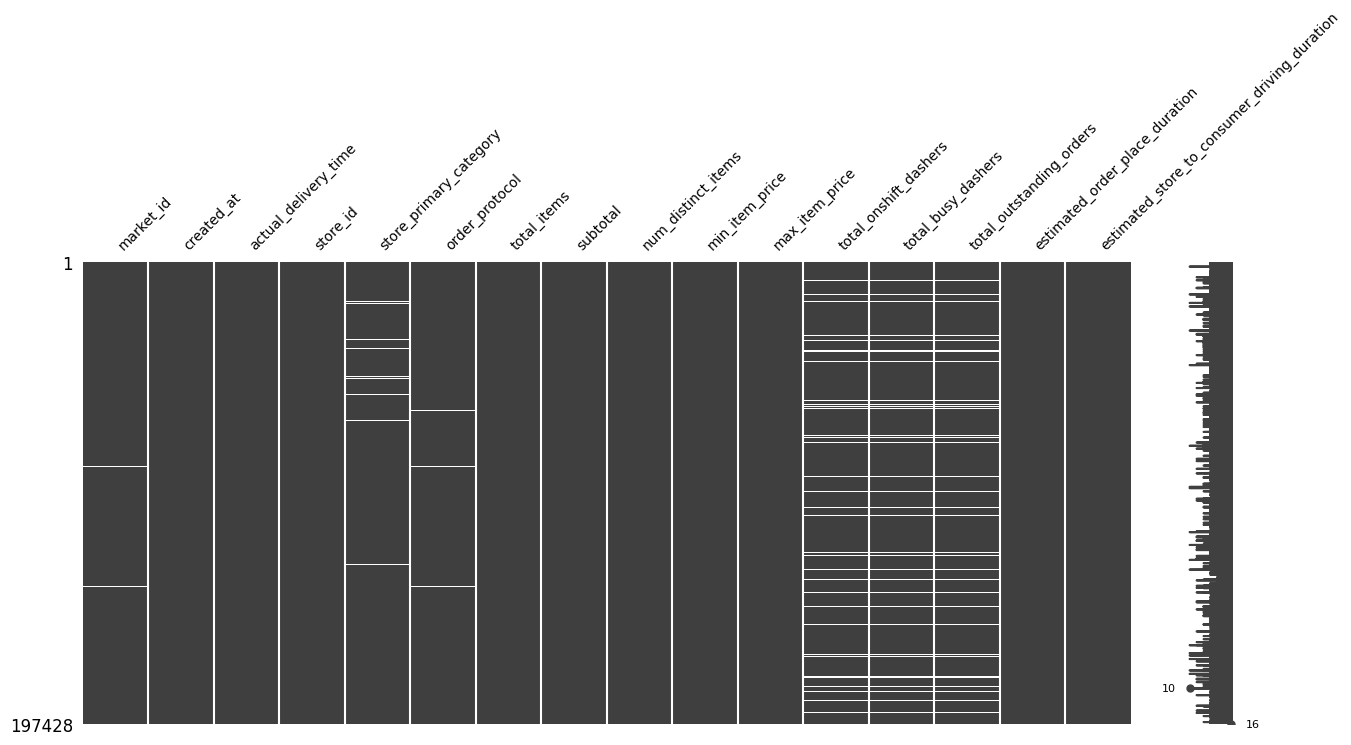

In [8]:
msno.matrix(df, figsize=(15, 6), fontsize=10);

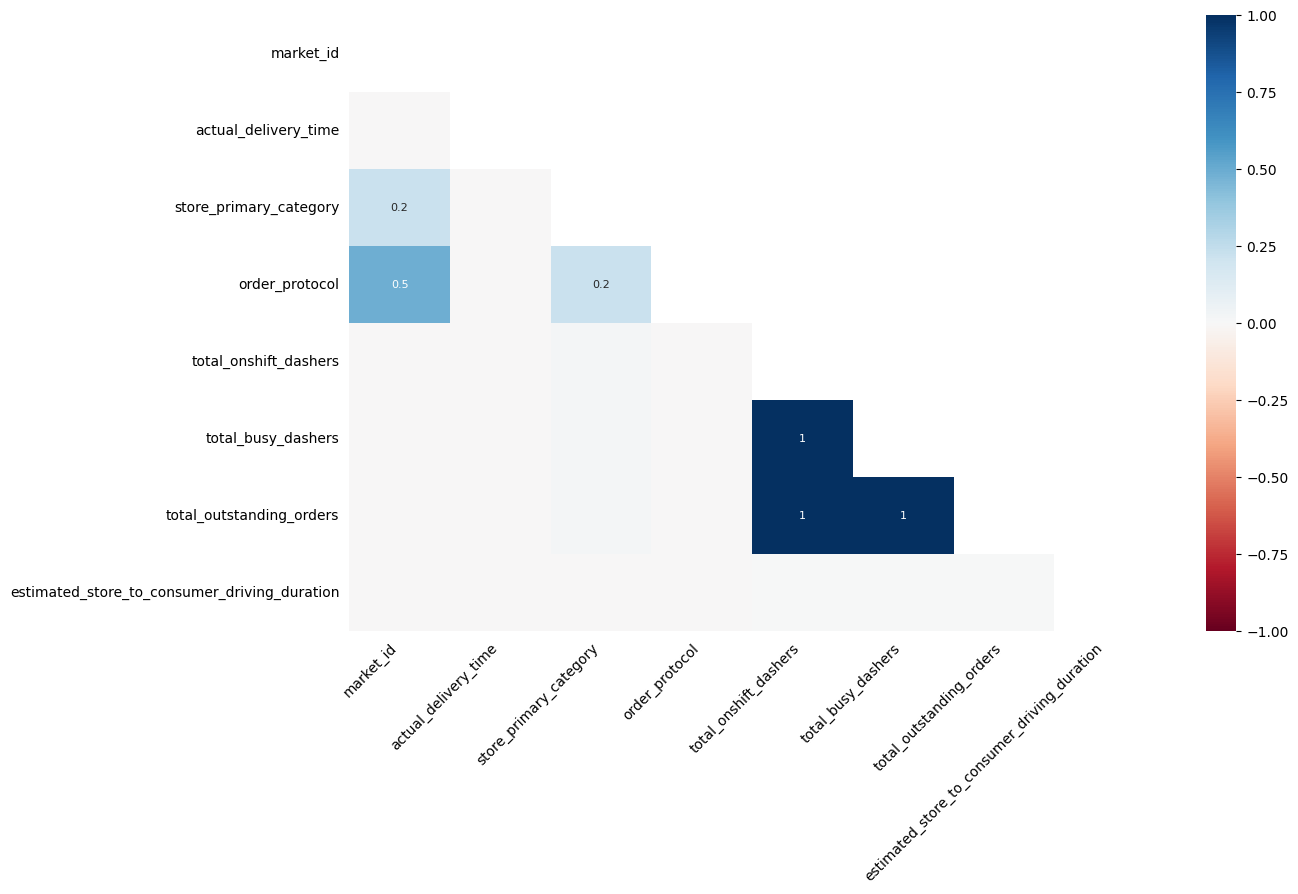

In [9]:
msno.heatmap(df, figsize=(13,8), fontsize=10);

In [10]:
# проверим наличие выбросов
df.describe().T.round(1)

,count,mean,min,25%,50%,75%,max,std
market_id,196441.0,2.978706,1.0,2.0,3.0,4.0,6.0,1.524867
created_at,197428,2015-02-04 22:00:09.537962752,2014-10-19 05:24:15,2015-01-29 02:32:42,2015-02-05 03:29:09.500000,2015-02-12 01:39:18.500000,2015-02-18 06:00:44,NaN
actual_delivery_time,197421,2015-02-04 22:48:23.348914432,2015-01-21 15:58:11,2015-01-29 03:22:29,2015-02-05 04:40:41,2015-02-12 02:25:26,2015-02-19 22:45:31,NaN
store_id,197428.0,3530.510272,1.0,1686.0,3592.0,5299.0,6987.0,2053.496711
order_protocol,196433.0,2.882352,1.0,1.0,3.0,4.0,7.0,1.503771
total_items,197428.0,3.196391,1.0,2.0,3.0,4.0,411.0,2.666546
subtotal,197428.0,2682.331402,0.0,1400.0,2200.0,3395.0,27100.0,1823.093688
num_distinct_items,197428.0,2.670791,1.0,1.0,2.0,3.0,20.0,1.630255
min_item_price,197428.0,686.21847,-86.0,299.0,595.0,949.0,14700.0,522.038648
max_item_price,197428.0,1159.58863,0.0,800.0,1095.0,1395.0,14700.0,558.411377


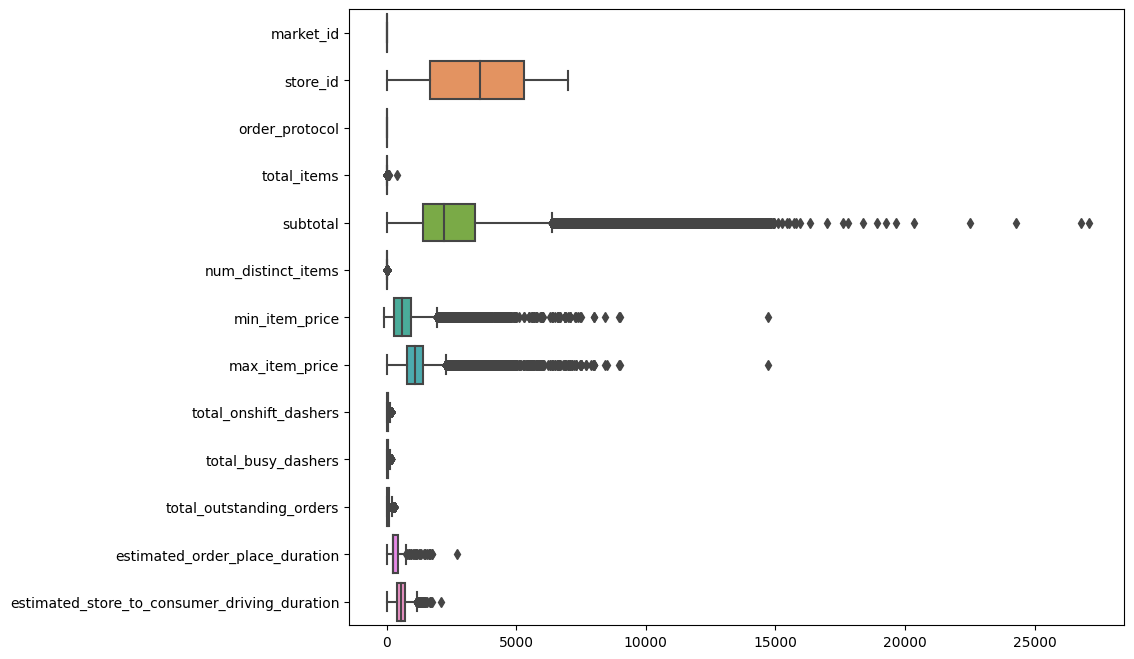

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(df, orient='h');

In [12]:
# импортируем свои функции для обработки данных
import my_functions as mf

In [13]:
# выполним предварительную обработку данных
pr_dataset, coltypes = mf.preprocess_data(df)
datetime_cols, categorical_cols, numeric_cols = coltypes

In [18]:
# посмотрим на данные после обработки и статистики по типам 
pr_dataset.sample(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
87439,4,2015-01-31 04:13:51,2015-01-31 04:50:32,3060,greek,3,4,2690,4,250,1095,82,90,159,251,301,2201
90874,4,2015-01-26 23:28:08,2015-01-26 23:56:53,2139,pizza,1,1,1900,1,1600,1600,10,31,13,446,333,1725
175283,3,2015-02-04 04:30:03,2015-02-04 05:07:44,2302,asian,5,2,1570,2,275,1295,22,15,14,251,244,2261


In [19]:
pr_dataset[categorical_cols].describe()

,market_id,store_id,store_primary_category,order_protocol
count,161280,161280,161280,161280
unique,6,6549,73,7
top,2,6865,american,1
freq,43916,804,16152,45037


In [20]:
pr_dataset[datetime_cols].describe()

,created_at,actual_delivery_time
count,161280,161280
mean,2015-02-04 20:58:13.159461632,2015-02-04 21:42:49.358568960
min,2015-01-21 15:22:03,2015-01-21 15:58:11
25%,2015-01-29 00:58:44.249999872,2015-01-29 01:37:54
50%,2015-02-05 03:08:38.500000,2015-02-05 04:06:12.500000
75%,2015-02-12 01:00:03.249999872,2015-02-12 01:40:25
max,2015-02-18 06:00:44,2015-02-18 07:07:47


In [21]:
pr_dataset[numeric_cols].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
total_items,161280.0,2.7,1.5,1.0,2.0,2.0,4.0,7.0
subtotal,161280.0,2288.9,1232.7,0.0,1325.0,2000.0,2998.0,6390.0
num_distinct_items,161280.0,2.4,1.2,1.0,1.0,2.0,3.0,6.0
min_item_price,161280.0,655.6,407.5,0.0,300.0,599.0,925.0,1924.0
max_item_price,161280.0,1066.9,385.8,0.0,799.0,1025.0,1300.0,2287.0
total_onshift_dashers,161280.0,37.6,31.4,0.0,12.0,30.0,57.0,135.0
total_busy_dashers,161280.0,35.1,29.7,0.0,10.0,28.0,55.0,133.0
total_outstanding_orders,161280.0,46.9,44.6,0.0,11.0,32.0,72.0,182.0
estimated_order_place_duration,161280.0,308.3,89.3,0.0,251.0,251.0,446.0,732.0
estimated_store_to_consumer_driving_duration,161280.0,540.4,217.1,0.0,378.0,539.0,697.0,1182.0


In [22]:
# извлечём месяц, день недели и час формарования заказа
pr_dataset, dt_features = mf.build_features(pr_dataset)
categorical_cols += dt_features
features_for_model = categorical_cols + numeric_cols

In [23]:
# разделим данные на обучающую и валидационную выборки
X = pr_dataset[categorical_cols + numeric_cols].drop('delivery_duration', axis=1)
y = pr_dataset['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
train_data, eval_data = mf.create_pools(X_train, X_test, y_train, y_test, categorical_cols)

In [24]:
# обучим модель catboost
params = {
    "iterations": 1000,
    "learning_rate": 0.2,
    "verbose": 100,
    "random_seed": 13,
    "early_stopping_rounds": 100, 
}
cb_model = mf.train_model(train_data, eval_data, params)

0:	learn: 842.0179492	test: 836.6883057	best: 836.6883057 (0)	total: 148ms	remaining: 2m 28s
100:	learn: 695.1414341	test: 694.8598776	best: 694.8598776 (100)	total: 5.38s	remaining: 47.9s
200:	learn: 684.7986073	test: 690.2809417	best: 690.2809417 (200)	total: 9.72s	remaining: 38.7s
300:	learn: 678.6201442	test: 688.7814632	best: 688.7542682 (297)	total: 14s	remaining: 32.6s
400:	learn: 673.5064064	test: 688.4128499	best: 688.3388189 (371)	total: 18.3s	remaining: 27.3s
500:	learn: 668.7491813	test: 687.7969883	best: 687.7969883 (500)	total: 22.6s	remaining: 22.5s
600:	learn: 664.0506925	test: 687.7500364	best: 687.6611128 (552)	total: 27s	remaining: 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 687.6611128
bestIteration = 552

Shrink model to first 553 iterations.


In [26]:
import shap
shap.initjs()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


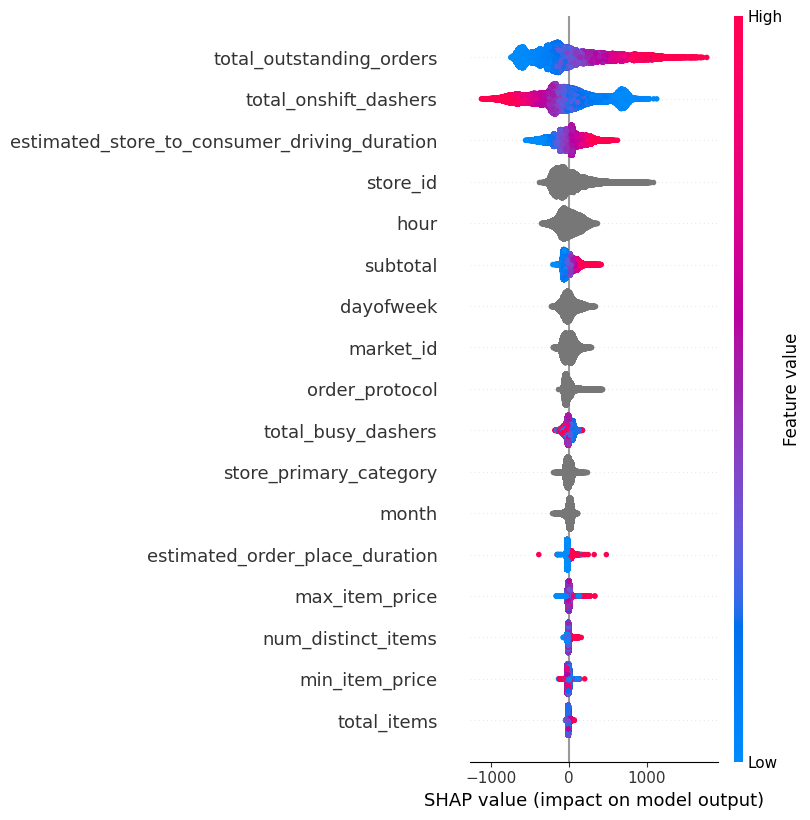

In [28]:
# оценим разделяющую способность признаков
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(train_data)
shap.summary_plot(shap_values, X_train)

In [31]:
# проверим какие признаки можно удалить без снижения производительности модели
mf.select_features(X_train, y_train, categorical_cols, n_iters=30)

,f_name,rnk,support,weak
0,market_id,1,True,False
14,total_outstanding_orders,1,True,False
13,total_busy_dashers,1,True,False
12,total_onshift_dashers,1,True,False
11,max_item_price,1,True,False
6,hour,1,True,False
8,subtotal,1,True,False
3,order_protocol,1,True,False
1,store_id,1,True,False
5,dayofweek,1,True,False
